In [5]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [130]:
dataset = pd.read_csv('C:/Users/warpl/Desktop/LR DTR/50_Startups.csv')
dataset.tail() #showcase few samples with zeros

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [347]:
#Preprocessing - check for missing values
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [95]:
dataset.info() #check for nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [368]:
#Handle missing values - treating zeros as missing values for accurate results
startup_ds = dataset[(dataset != 0).all(1)] 
startup_ds


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [369]:
features = startup_ds.iloc[:,:-1].values
label = startup_ds.iloc[:,[-1]].values
features

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [370]:
#convert the categorical features (State) into numerical features as you cannot perform regression on sklearn only works with numpy array

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer   #using column transformer is easier as compared to label encoding + onehottrans
transformer = ColumnTransformer(transformers=[
        ("Hot",       #user-defined name
         OneHotEncoder(), #calling the class
         [3]              #column number to apply it on i.e., State (count starts from zero)
         )
    ],
    remainder='passthrough' #other columns are unaffected
)
features = transformer.fit_transform(features.tolist())
features

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [407]:
#converting features into array
features = features.astype(float)
features

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00,

In [408]:
#DTR Model 1

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=10)



from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(criterion='mse', max_depth=11,splitter='best')
DTR.fit(X_train,y_train)

y_pred = DTR.predict(X_test)

from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 7504.003849806446


In [409]:
print(DTR.score(X_train,y_train))
print(DTR.score(X_test,y_test))  #Accuracy for DTR Model 1


1.0
0.9525314644661736


In [443]:
##RF model 1

from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators=2, random_state =2)
RF.fit(X_train,y_train.ravel())
print(RF.score(X_train,y_train))
print(RF.score(X_test,y_test))


y_pred = RF.predict(X_test)
    
from sklearn import metrics
print('Root Mean Squared Error test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.9336774784152369
0.9476944531519035
Root Mean Squared Error test: 7877.057305482012


In [452]:
#RF model 1 above has better test score with low RMSE

# DTR Model 2

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=10)


from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(criterion='mse', max_depth=5,splitter='best')
DTR.fit(X_train,y_train)

y_pred = DTR.predict(X_test)


from sklearn import metrics 
print('Root Mean Squared Error test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Root Mean Squared Error test: 7665.582937889253


In [454]:
print(DTR.score(X_train,y_train))
print(DTR.score(X_test,y_test))  #Accuracy for DTR Model 2

0.9993997624539896
0.9504652345714748


In [465]:
##RF model 2

from sklearn.ensemble import RandomForestRegressor
RF =RandomForestRegressor(n_estimators=10, random_state =2)
RF.fit(X_train,y_train.ravel())
print(RF.score(X_train,y_train))
print(RF.score(X_test,y_test))

y_pred = RF.predict(X_test)
    
from sklearn import metrics
print('Root Mean Squared Error test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.979889461499668
0.9516546706179326
Root Mean Squared Error test: 7572.990172316282


In [467]:
#DTR Model 3

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=7)

#Model 1

from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(criterion='mse', max_depth=11,splitter='best')
DTR.fit(X_train,y_train)

y_pred = DTR.predict(X_test)

from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 7297.075421567188


In [468]:
print(DTR.score(X_train,y_train))
print(DTR.score(X_test,y_test))  #Accuracy for DTR Model 3

1.0
0.9279750170634339


In [476]:
##RF model 3

from sklearn.ensemble import RandomForestRegressor
RF =RandomForestRegressor(n_estimators=12, random_state =1)
RF.fit(X_train,y_train.ravel())
print(RF.score(X_train,y_train))
print(RF.score(X_test,y_test))

y_pred = RF.predict(X_test)
    
from sklearn import metrics
print('Root Mean Squared Error test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.9843902784103408
0.9463272727568709
Root Mean Squared Error test: 6299.180960254549


In [349]:
#LR

startup_ds.info() #confirm count of non-zero samples

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 46
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        46 non-null     float64
 1   Administration   46 non-null     float64
 2   Marketing Spend  46 non-null     float64
 3   State            46 non-null     object 
 4   Profit           46 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.2+ KB


C:\Users\warpl\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


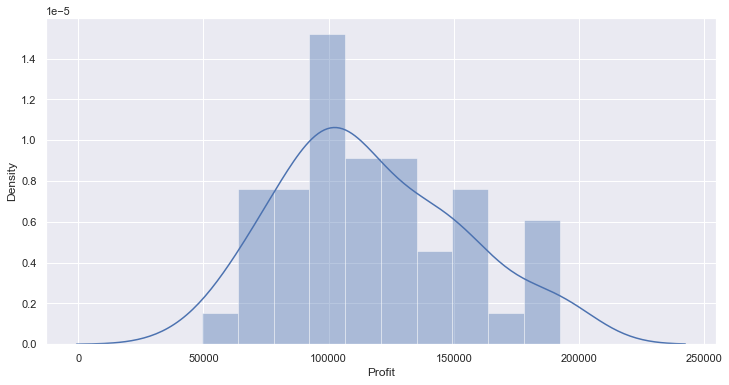

In [68]:
sns.set(rc={'figure.figsize':(12,6)})
sns.distplot(startup_ds['Profit'], bins = 10)
plt.show()

<AxesSubplot:>

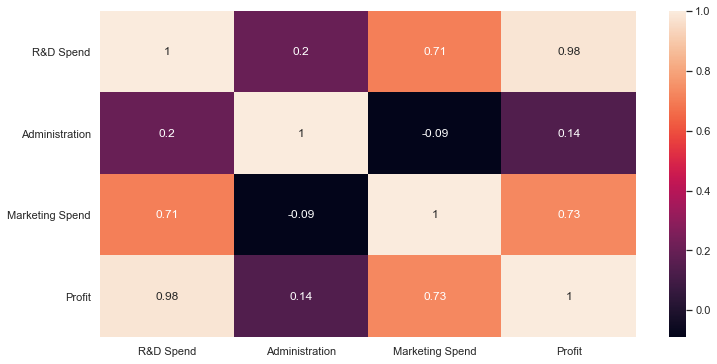

In [69]:
correlation_matrix = startup_ds.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

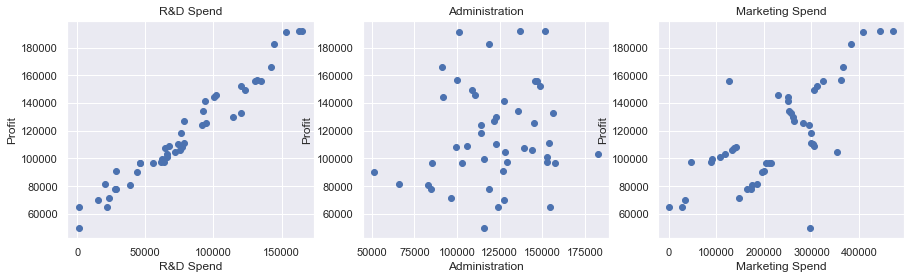

In [351]:
#Plot to understand relationship between variables
plt.figure(figsize=(15, 4))

features = ['R&D Spend','Administration','Marketing Spend']
target = startup_ds['Profit']  #renaming dependent variable to avoid confusion with xlabel and ylabel

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = startup_ds[col]
    y = target  
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Profit')

In [353]:
#R&D Spend is close to an linear relationship. Marketing Spend is somewhat linear with too many outliers

#LR Model 1 (only R&D Spend)

X = pd.DataFrame(np.c_[startup_ds['R&D Spend']], columns = ['R&D Spend'])
Y = startup_ds['Profit']

In [343]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=3)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(36, 1)
(10, 1)
(36,)
(10,)


In [344]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LTR = LinearRegression()
LTR.fit(X_train, Y_train)

LinearRegression()

In [345]:

y_train_predict = LTR.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print("The model performance for training set")
print('RMSE is {}'.format(rmse))
print("\n")

# model evaluation for testing set
y_test_predict = LTR.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("The model performance for testing set")
print('RMSE is {}'.format(rmse))


The model performance for training set
RMSE is 7701.893499560601


The model performance for testing set
RMSE is 6568.120437628479


In [346]:
#Random state = 3 yields lowest error in test set
#Check accuracy of LTR using score for LTR Model 1
LTR.score(X_test, Y_test) 
score = LTR.score(X_test, Y_test) * 100
print('The accuracy of the LTR model 1 is {} %'.format(score))

The accuracy of the LTR model 1 is 94.55669394539252 %


In [320]:
#LR Model 2 (incl. Marketing Spend)

X = pd.DataFrame(np.c_[startup_ds['R&D Spend'], startup_ds['Marketing Spend']], columns = ['R&D Spend','Marketing Spend'])
Y = startup_ds['Profit']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=3)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(36, 2)
(10, 2)
(36,)
(10,)


In [321]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LTR = LinearRegression()
LTR.fit(X_train, Y_train)

y_train_predict = LTR.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print("The model performance for training set")
print('RMSE is {}'.format(rmse))
print("\n")

y_test_predict = LTR.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("The model performance for testing set")
print('RMSE is {}'.format(rmse))


The model performance for training set
RMSE is 7548.683778270607


The model performance for testing set
RMSE is 5829.916580377023


In [303]:
#Random state = 3 yields lowest error in test set

#Check accuracy of LTR using score for LTR Model 2
LTR.score(X_test, Y_test) 
score = LTR.score(X_test, Y_test) * 100
print('The accuracy of LTR model 2 is {} %'.format(score))

The accuracy of LTR model 2 is 95.71150192734844 %


In [ ]:
#LR model 2 has lowest RMSE (5829.91) among all 3 alogrithms while maintaining high accuracy of 95.71%